### Multi class logistic regression

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
from PIL import Image

In [45]:
train_data = scio.loadmat("./ex3data1.mat")
X = train_data['X']
Y = train_data['y']

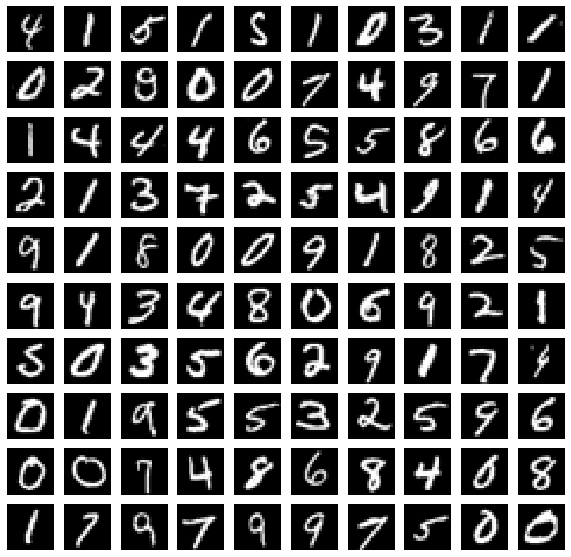

In [74]:
fig = plt.figure(figsize=(10, 10))  

data_to_show = np.random.permutation(X)[:100,:]
SIZE = 10
for i in range(0, SIZE):
    for j in range(0, SIZE):
        plt.subplot(SIZE, SIZE, i * SIZE + j + 1)
        # Must use order='F'(Fortant-like style)!!
        arr = data_to_show[i * SIZE + j].reshape((20, 20), order='F')
        arr = arr * 255
        img = Image.fromarray(arr)
        plt.imshow(img)
        plt.axis('off')
plt.show()

In [153]:
def hypothesis(X, theta):
    return 1 / (1 + np.exp(-np.matmul(X, theta)))

def compute_loss_reg(X, Y, theta, lamb=0.1):
    H = hypothesis(X, theta)
    return np.sum(-np.matmul(Y.T, np.log(H)) - np.matmul((1 - Y).T, np.log(1 - H))) / len(X) + lamb * np.sum(theta**2) / (2 * len(X))
  

lamb = 0.1
epoch = 2000
learning_rate = 0.8
thetas = np.array([])
num_class = 10
num_sample = len(X)
print(num_sample)
for i in range(1, num_class + 1):
    y = Y.copy()
    # Set all other class as 0
    # and the corresponding class as 1
    # The order is very important
    y[y != i] = 0
    y[y == i] = 1
    theta = np.zeros([X.shape[1], 1])
    losses = np.array([])
    for _ in range(epoch):
        losses = np.append(losses, compute_loss_reg(X, y, theta, lamb))
        H = hypothesis(X, theta)
        # Use Gradient descend
        gradient = np.matmul((H - y).T, X) / num_sample
        gradient += lamb * theta.T / num_sample
        gradient[0] -= lamb * theta[0] / num_sample
        theta -= learning_rate * gradient.T
        theta -= delta.T
    thetas = np.append(thetas, theta)
    print(losses[0], losses[-1])
thetas = thetas.reshape(num_class, -1)

5000
0.6931471805599453 0.03171868958279481
0.6931471805599453 0.06944299817074798
0.6931471805599453 0.0799036830766468
0.6931471805599453 0.05093224285793446
0.6931471805599453 0.07180129057483024
0.6931471805599453 0.03470707347253651
0.6931471805599453 0.04465751068715117
0.6931471805599453 0.13075155022711343
0.6931471805599453 0.09800432999816532
0.6931471805599453 0.02255958709341368


In [152]:
def get_accuracy(predicted, expected):
    return np.sum((predicted == expected).astype(int)) / num_sample

# for theta in thetas:
#     H = hypothesis(X[0], theta)
#     print(H)
# print(Y[0])

predicted = np.array([])
for i in range(num_sample):
    max_y = 0
    max_accuracy = 0
    for j in range(len(thetas)):
        accuracy = hypothesis(X[i], thetas[j])
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            max_y = j + 1
    predicted = np.append(predicted, max_y)
print(get_accuracy(predicted, Y.ravel()))

0.9178


In [ ]:
#### Neural Network

In [127]:
weights = scio.loadmat("./ex3weights.mat")
theta1 = weights['Theta1']
print(theta1.shape)
theta2 = weights['Theta2']
print(theta2.shape)

(25, 401)
(10, 26)


In [145]:
def forward(X, theta1, theta2):
    data = np.c_[np.ones(len(X)), X]
    h = hypothesis(data, theta1.T)
    return hypothesis(np.c_[np.ones(len(h)), h], theta2.T)

output = forward(X, theta1, theta2)

predicted = np.array([])
for i in range(len(output)):
    max_y = 0
    max_accuracy = 0
    for j in range(len(output[i])):
        if output[i][j] > max_accuracy:
            max_accuracy = output[i][j]
            max_y = j + 1
    predicted = np.append(predicted, max_y)
print(get_accuracy(predicted, Y.ravel()))

0.9752
